In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy import stats
import os,sys
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier,AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
taxi= pd.read_csv('NYC taxi fare pred.csv')

In [ ]:
taxi.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.800
1,2015-01-27 13:08:24.0000003,10.195
2,2011-10-08 11:53:44.0000002,4.420
3,2012-12-01 21:12:12.0000002,9.154
4,2012-12-01 21:12:12.0000003,16.074


In [ ]:
taxi.tail()

,key,fare_amount
9909,2015-05-10 12:37:51.0000002,8.8400
9910,2015-01-12 17:05:51.0000001,10.8200
9911,2015-04-19 20:44:15.0000001,52.0415
9912,2015-01-31 01:05:19.0000005,19.5100
9913,2015-01-18 14:06:23.0000006,8.0750


In [ ]:
taxi.shape[0]

9914

In [ ]:
taxi.columns

Index(['key', 'fare_amount'], dtype='object')

In [ ]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          9914 non-null   object 
 1   fare_amount  9914 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.0+ KB


In [ ]:
taxi.dtypes

key             object
fare_amount    float64
dtype: object

In [ ]:
taxi.isnull().sum()

key            0
fare_amount    0
dtype: int64

In [ ]:
taxi.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.800
1,2015-01-27 13:08:24.0000003,10.195
2,2011-10-08 11:53:44.0000002,4.420
3,2012-12-01 21:12:12.0000002,9.154
4,2012-12-01 21:12:12.0000003,16.074


In [ ]:
taxi.key.unique()

array(['2015-01-27 13:08:24.0000002', '2015-01-27 13:08:24.0000003',
       '2011-10-08 11:53:44.0000002', ..., '2015-04-19 20:44:15.0000001',
       '2015-01-31 01:05:19.0000005', '2015-01-18 14:06:23.0000006'],
      dtype=object)

In [ ]:
taxi.value_counts()

key                          fare_amount
2009-01-01 11:04:24.0000001  7.2280         1
2013-06-02 16:26:47.0000003  7.7550         1
2013-05-26 15:18:37.0000005  22.9383        1
2013-05-28 18:24:27.0000001  6.2850         1
2013-05-28 18:24:27.0000002  4.5640         1
                                           ..
2011-05-19 16:01:41.0000002  5.3790         1
2011-05-19 16:01:41.0000003  22.6828        1
2011-05-19 16:01:41.0000004  5.7140         1
2011-05-19 16:01:41.0000005  4.4810         1
2015-06-30 20:03:50.0000005  9.9500         1
Length: 9914, dtype: int64

In [ ]:
taxi.key.replace(['2010-10-28 12:38:55.0000002','2010-10-28 12:38:55.0000002'], [1,0], inplace =True)

In [ ]:
taxi.fare_amount.unique()

array([ 9.8   , 10.195 ,  4.42  , ..., 44.0202, 52.0415, 19.51  ])

In [ ]:
taxi.value_counts()

key                          fare_amount
2009-01-01 11:04:24.0000001  7.2280         1
2013-06-02 16:26:47.0000003  7.7550         1
2013-05-26 15:18:37.0000005  22.9383        1
2013-05-28 18:24:27.0000001  6.2850         1
2013-05-28 18:24:27.0000002  4.5640         1
                                           ..
2011-05-19 16:01:41.0000002  5.3790         1
2011-05-19 16:01:41.0000003  22.6828        1
2011-05-19 16:01:41.0000004  5.7140         1
2011-05-19 16:01:41.0000005  4.4810         1
2015-06-30 20:03:50.0000005  9.9500         1
Length: 9914, dtype: int64

In [ ]:
taxi.describe()

,fare_amount
count,9914.000000
mean,11.411370
std,8.883098
min,2.504000
25%,6.408000
50%,8.683500
75%,12.593750
max,108.796900


In [ ]:
taxi.corr()

,fare_amount
fare_amount,1.0


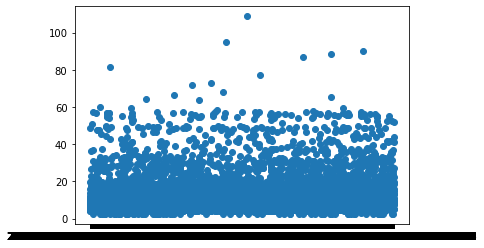

In [ ]:
plt.scatter(taxi.key, taxi.fare_amount)

<AxesSubplot:xlabel='fare_amount', ylabel='Count'>

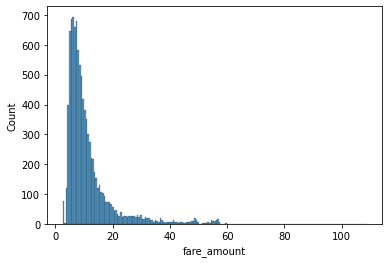

In [ ]:
sns.histplot(taxi.fare_amount)

In [ ]:
taxi.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.800
1,2015-01-27 13:08:24.0000003,10.195
2,2011-10-08 11:53:44.0000002,4.420
3,2012-12-01 21:12:12.0000002,9.154
4,2012-12-01 21:12:12.0000003,16.074


In [ ]:
taxi.loc[taxi.fare_amount ==9.800 ,['fare_amount', 'key']] 

,fare_amount,key
0,9.8,2015-01-27 13:08:24.0000002
9364,9.8,2014-10-27 14:58:00.00000056
9488,9.8,2011-12-13 22:00:00.00000066


In [ ]:
X = taxi.drop('fare_amount', axis=1)
y = taxi['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [ ]:
svc = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

models = [svc, decision_tree, random_forest]

In [ ]:
taxi['fare_amount'].value_counts()

6.8850     8
5.6300     7
5.7300     6
7.8400     6
5.7050     6
          ..
6.6640     1
11.6307    1
6.4470     1
3.9590     1
19.5100    1
Name: fare_amount, Length: 8105, dtype: int64

In [ ]:
X_test.shape

(2975, 1)

In [ ]:
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    print(f'This {model} has an accuracy of {accuracy}')

ValueError: could not convert string to float: '2010-10-28 12:38:55.0000002'

In [ ]:
joblib.dump(svc, 'svc_model.pkl')

['svc_model.pkl']

In [ ]:
X_test.iloc[24]

key    2010-12-09 07:29:00.000000155
Name: 3034, dtype: object

In [ ]:
y_test.iloc[24]

8.404000000000003